In [2]:
# Data handling
import pandas as pd 
import seaborn as sns
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Machine Learning: model, training, splitting, evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Loading dataset
df = sns.load_dataset("tips")
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [4]:
# Stats for numeric columns (quick insights)
df.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [5]:
# Overview of structure & types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
# Number of missing values per column
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

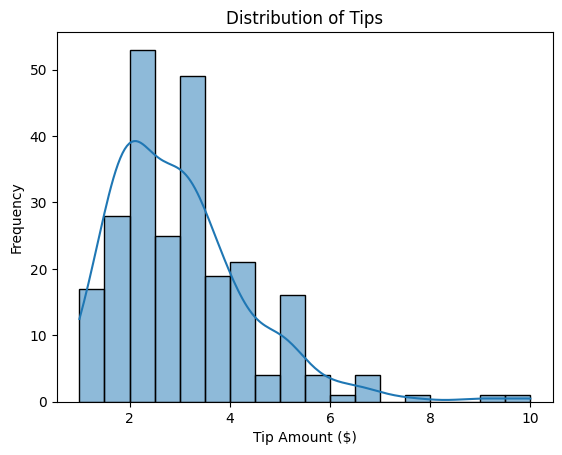

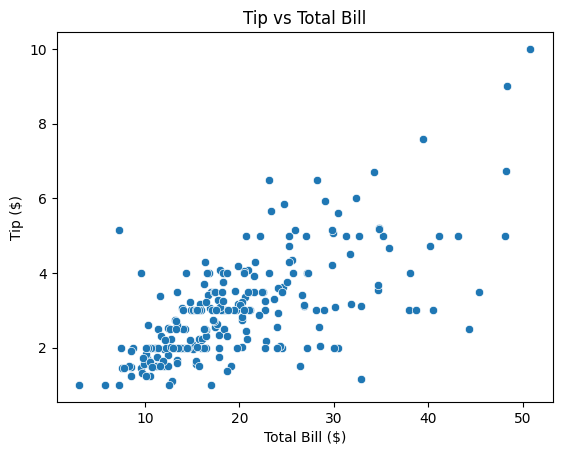

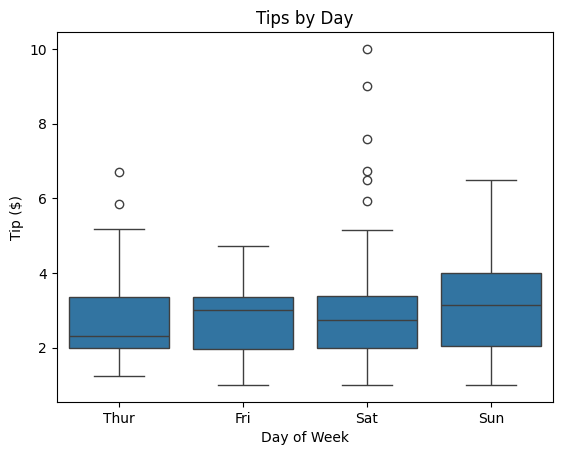

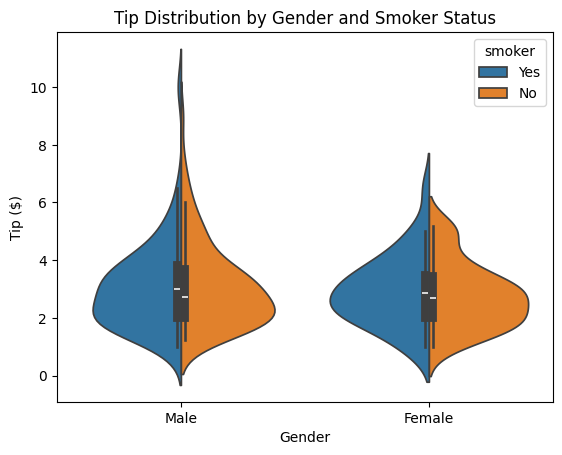

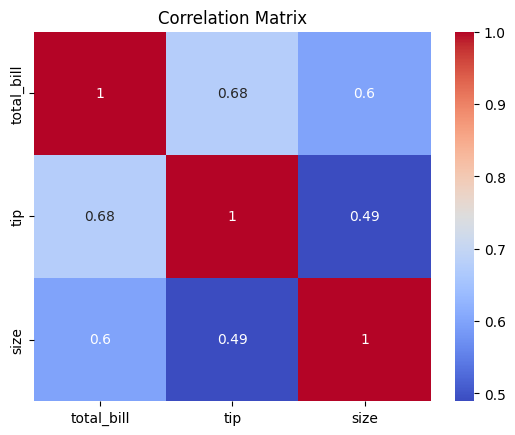

In [7]:
# Histogram (shows how often each tip amount appears)
sns.histplot(df['tip'], kde=True)
plt.title("Distribution of Tips")
plt.xlabel("Tip Amount ($)")
plt.ylabel("Frequency")
plt.show()

# Scatterplot (shows the relationship between how much people spend and how much they tip)
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title("Tip vs Total Bill")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.show()

# Boxplot (shows the range of tips for that day)
sns.boxplot(x='day', y='tip', data=df)
plt.title("Tips by Day")
plt.xlabel("Day of Week")
plt.ylabel("Tip ($)")
plt.show()

# Violin Plot (gender and smoking status affect tipping)
sns.violinplot(x='sex', y='tip',hue='smoker', data=df, split=True)
plt.title("Tip Distribution by Gender and Smoker Status")
plt.xlabel("Gender")
plt.ylabel("Tip ($)")
plt.show()

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Now calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap - how features correlate to each other
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()          

In [8]:
numeric_df.corr()

total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

# Linear Regression

In [9]:
# Define the features (X) and the target (y)
X = df[['total_bill', 'size']]
y = df['tip']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [13]:
# Evaluate the model using RMSE (lower RMSE = better model)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("Root Mean Squared Error (RMSE):", round(rmse,2))

Root Mean Squared Error (RMSE): 0.81


In [14]:
# View model coefficients
print("Intercept:", model.intercept_) # Baseline tip amount 
print("Coefficients:", model.coef_) 

# Coeff 1 (total bill) - tells how much the tip increases for each extra dollar on the bill.
# Coeff 2 (size) - tells how much the tip increases for additional person in the group

Intercept: 0.5681370921350042
Coefficients: [0.09088117 0.26501754]


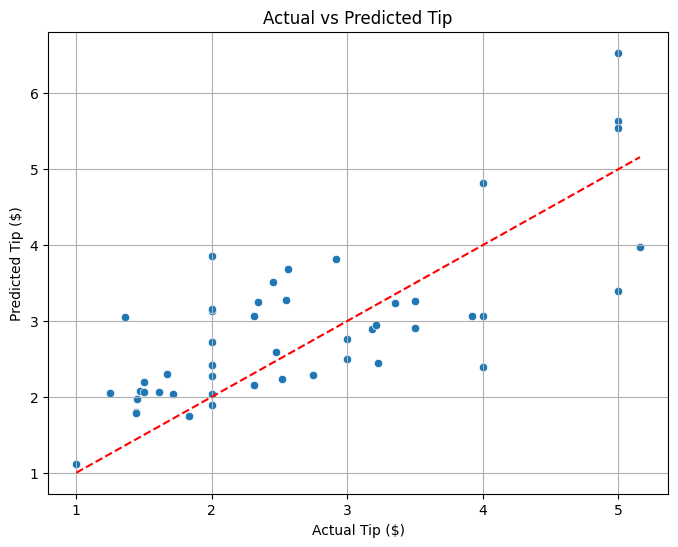

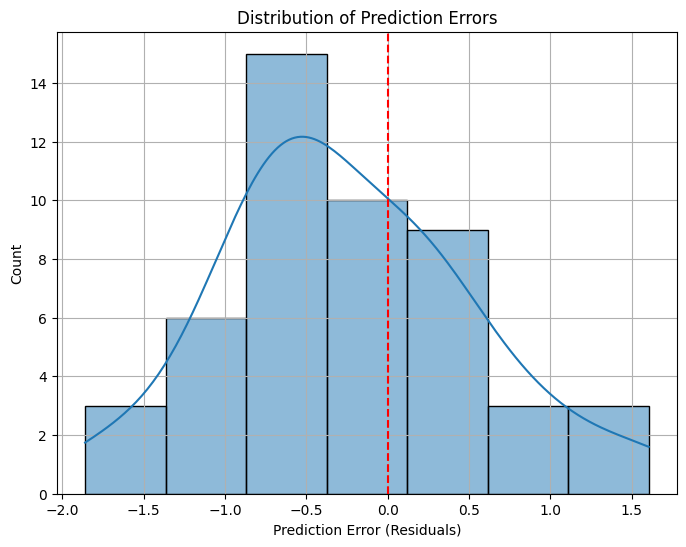

In [15]:
# Visualization 

# 1- Scatterplot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Tip ($)")
plt.ylabel("Predicted Tip ($)")
plt.title("Actual vs Predicted Tip")
plt.grid(True)
plt.show()

# 2- Residual Plot: Error Distribution
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Prediction Error (Residuals)")
plt.title("Distribution of Prediction Errors")
plt.grid(True)
plt.show()

# Insights: 

Using a simple linear regression model with just two features â€” `total_bill` and `size` â€” we were able to predict tip amounts with a reasonable level of accuracy. The model achieved a Root Mean Squared Error (RMSE) of approximately **\$0.81**, indicating that on average, the predicted tip values were within 81 cents of the actual tips. The analysis showed that the **total bill** had the strongest influence on tip amount (coefficient â‰ˆ 0.09), meaning each additional dollar spent resulted in a 9-cent increase in the expected tip. **Party size** also had a smaller but positive effect (â‰ˆ \$0.27 per person). While most predictions were close to the actual values â€” especially for typical tip ranges â€” the model tended to struggle with **higher tip values**, likely due to their rarity in the dataset. Overall, this simple model provides a solid baseline and highlights clear linear relationships, setting the stage for improved performance by incorporating additional features in a more complete version of the model.


# Version 2 - Full Tip Prediction Model 
## Using all features from the dataset

In [17]:
# One-hot encode the categorial variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

df_encoded.head()

total_bill   tip  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0       16.99  1.01     2        True       True    False    False     True   
1       10.34  1.66     3       False       True    False    False     True   
2       21.01  3.50     3       False       True    False    False     True   
3       23.68  3.31     2       False       True    False    False     True   
4       24.59  3.61     4        True       True    False    False     True   

   time_Dinner  
0         True  
1         True  
2         True  
3         True  
4         True

In [18]:
# Define Features and Target

X = df_encoded.drop('tip', axis=1)

y = df_encoded['tip']

In [19]:
# Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
# Train the model

model_full = LinearRegression()
model_full.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict and Evaluate

y_pred_full = model_full.predict(X_test)

mse_full = mean_squared_error(y_test, y_pred_full)
rmse_full = mse_full ** 0.5

print("RMSE (Full Model):", round(rmse_full, 2))

RMSE (Full Model): 0.84


In [22]:
# Analyze 

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_full.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df

Feature  Coefficient
1         size     0.233484
3    smoker_No     0.192353
4      day_Fri     0.179721
6      day_Sun     0.128928
0   total_bill     0.094700
5      day_Sat    -0.006064
2   sex_Female    -0.028819
7  time_Dinner    -0.094957

### ðŸ’¡ **Insight â€“ Full Model with All Features**

The full model using all available features produced an RMSE of **\$0.84**, slightly higher than the simpler model (RMSE = \$0.81), suggesting that some of the additional features may have introduced noise rather than improving prediction accuracy. Among all variables, **party size** and **whether the customer was a smoker** had the strongest impact on the tip amount. Non-smokers tended to tip about **\$0.19 more** than smokers, and each additional person at the table increased the tip by around **\$0.23**. Interestingly, **Fridays and Sundays** also showed a positive effect on tipping, while features like **sex** and **time of day** had minimal or even slightly negative influence. These results highlight that while total bill remains a key predictor, behavioral and contextual factors like group size and smoking status also play important roles in tipping behavior.